# HWTW Exploratory Data Analysis Notebook
author(s):  David Yerrington (david@yerrington.net), Hig (hig314@gmail.com)


Visual exploration of cleaned weather data.

In [45]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Import Cleaned Data

In [50]:
df = pd.read_csv("../data/processed/25339_short_cleaned.csv", index_col = 0)

### Use Datetime as Index

In [51]:
df['yearmonthday'] = pd.to_datetime(df['yearmonthday'])
df.index = df['yearmonthday']

### Basic Stats

In [52]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
relative_humidity,20385.0,83.308560,16.564513,12.00,78.00,89.0,93.00,100.00
dew_point_temp,19891.0,35.164346,12.666960,0.00,28.00,36.0,46.00,58.00
dry_bulb_temp,20338.0,39.576900,12.728919,0.00,32.00,39.0,51.00,73.00
maintenance_indicator,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pressure_tendency,6779.0,4.272607,2.748379,0.00,1.00,3.0,6.00,8.00
sea_level_pressure,20391.0,306.131136,327.723039,0.00,94.00,165.0,280.00,999.00
station_pressure,20395.0,29.758217,0.357665,28.52,29.54,29.8,30.01,30.71
time,38214.0,1179.936908,683.406753,10.00,556.25,1153.0,1753.00,2359.00
val_for_wind_char,38211.0,2.967392,7.659236,0.00,0.00,0.0,0.00,57.00
wet_bulb_temp,20310.0,37.548006,12.121479,0.00,30.00,38.0,48.00,60.00


### Timeseries by Month

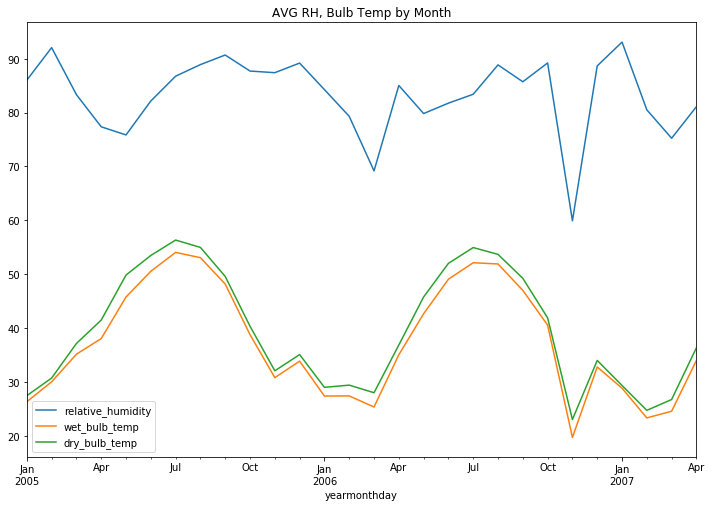

In [53]:
df.resample("M")[['relative_humidity', 'wet_bulb_temp', 'dry_bulb_temp']].mean().plot(
    title = "AVG RH, Bulb Temp by Month",
    figsize = (12, 8)
)

In [55]:
# sns.lineplot(x = "yearmonthday", y = 'relative_humidity', data = df)

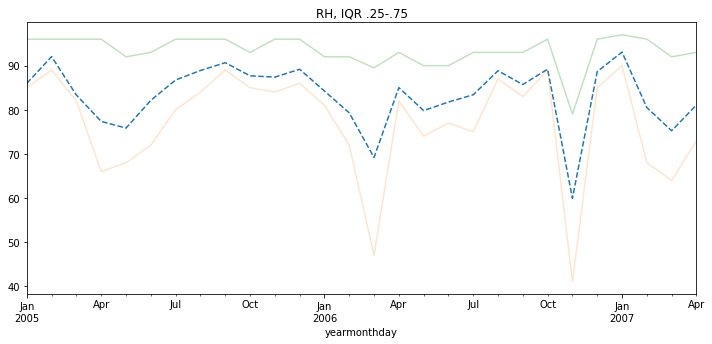

In [90]:
display_var = "relative_humidity"

ax = df.resample("M")[display_var].mean().plot(
    title = "RH, IQR .25-.75",
    figsize = (12, 5),
    linestyle = "--"
)

ax = df.resample("M")[display_var].quantile(.25).plot(
    figsize = (12, 5),
    linestyle = "-",
    alpha = .2
)

ax = df.resample("M")[display_var].quantile(.75).plot(
    figsize = (12, 5),
    linestyle = "-",
    alpha = .3
)

### TBD: Prototype Search Widget

-- I'll build a quick interface for searching this stuff tomorrow.